 DATA SET : Concrete Compressive Strength
INPUT VARIABLES=8
OUTPUT VARIABLE=1
TARGET VARIABLE IS Concrete Compressive Strength

 IMPORT THE NECESSARY LIBRARIES

---







In [ ]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
# allow plots to appear directly in the notebook
%matplotlib inline

**GETTING THE DATA**

In [ ]:
data = pd.read_csv("/content/Concrete_Data.csv")
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [ ]:
data.shape

(1030, 9)

TOTAL OBSERVATIONS ARE 1030 AND 9 FEATURES

In [ ]:
data.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object


SIMPLIFYING COLUMN NAMES,SINCE THEY APPEAR TO BE TOO LENGTHY

In [ ]:
data= data.rename(columns = {
    'Cement (component 1)(kg in a m^3 mixture)':'Cement',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Furnace_Slag', 
    'Fly Ash (component 3)(kg in a m^3 mixture)':'Fly_Ash', 
    'Water  (component 4)(kg in a m^3 mixture)':'Water', 
    
    'Superplasticizer (component 5)(kg in a m^3 mixture)':'Super_Plasticizer', 
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'Coarse_agg',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)':'Fine_agg', 
    'Age (day)':'Age', 
    'Concrete compressive strength(MPa, megapascals) ': 'Cc_Strength'})

data

,Cement,Furnace_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_agg,Fine_agg,Age,Cc_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [ ]:
data.columns

Index(['Cement', 'Furnace_Slag', 'Fly_Ash', 'Water', 'Super_Plasticizer',
       'Coarse_agg', 'Fine_agg', 'Age', 'Cc_Strength'],
      dtype='object')

**DATA CLEANING**

CHECKING FOR NULL VALUES

In [ ]:
data.isnull().sum()

Cement               0
Furnace_Slag         0
Fly_Ash              0
Water                0
Super_Plasticizer    0
Coarse_agg           0
Fine_agg             0
Age                  0
Cc_Strength          0
dtype: int64

We can find that the given data doesn't have any NULL values, Thus it is considered as clean data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cement             1030 non-null   float64
 1   Furnace_Slag       1030 non-null   float64
 2   Fly_Ash            1030 non-null   float64
 3   Water              1030 non-null   float64
 4   Super_Plasticizer  1030 non-null   float64
 5   Coarse_agg         1030 non-null   float64
 6   Fine_agg           1030 non-null   float64
 7   Age                1030 non-null   int64  
 8   Cc_Strength        1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


** LINEAR REGRESSION MODELLING(FITTING THE DATA MODEL)**

In [ ]:
# independent variables
x = data.drop(['Cc_Strength'],axis=1)
# dependent variables
y = data['Cc_Strength']

In [ ]:
# importing train_test_split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
stand= StandardScaler()
Fit = stand.fit(xtrain)
xtrain_scl = Fit.transform(xtrain)
xtest_scl = Fit.transform(xtest)

In [ ]:
# import linear regression models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr=LinearRegression()
fit=lr.fit(xtrain_scl,ytrain)
score = lr.score(xtest_scl,ytest)
print('predicted score is : {}'.format(score))
print('..................................')
y_predict = lr.predict(xtest_scl)
print('mean_sqrd_error is ==',mean_squared_error(ytest,y_predict))
rms = np.sqrt(mean_squared_error(ytest,y_predict)) 
print('root mean squared error is == {}'.format(rms))

predicted score is : 0.5943782479239206
..................................
mean_sqrd_error is == 109.75080797014401
root mean squared error is == 10.47620198211852


ANOTHER method

In [ ]:
lm=smf.ols(formula='Cc_Strength~Cement+Furnace_Slag+Fly_Ash+Water+Super_Plasticizer+Coarse_agg+Fine_agg+Age',data=data).fit()
lm.params

Intercept           -23.331214
Cement                0.119804
Furnace_Slag          0.103866
Fly_Ash               0.087934
Water                -0.149918
Super_Plasticizer     0.292225
Coarse_agg            0.018086
Fine_agg              0.020190
Age                   0.114222
dtype: float64

In [ ]:
x=data[['Cement','Furnace_Slag','Fly_Ash','Water','Super_Plasticizer','Coarse_agg','Fine_agg','Age']]
y=data.Cc_Strength
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)
lm1=LinearRegression()
lm1.fit(x_train,y_train)
y_pred=lm1.predict(x_test)
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

10.898922960964384


In [ ]:
lm.rsquared

0.6155198704142723

In [ ]:
print(lm1.intercept_)
print(lm1.coef_)

-31.917680633922835
[ 0.12666577  0.10914132  0.09459018 -0.12819427  0.34888624  0.01908373
  0.02111414  0.11685951]


In [ ]:
lm1.score(x_test,y_test)

0.5546702293815022

In [ ]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Cc_Strength   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     204.3
Date:                Thu, 15 Dec 2022   Prob (F-statistic):          6.29e-206
Time:                        10:40:41   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -23.3312     26.586     -0.878      0.380     -75.500      28.837
Cement                0.1198      0.008     14.113      0.000       0.103       0.136
Furnace_Slag          0.1039      0.010     10.247      0.000       0.084       0.124
Fly_Ash               0.0879      0.013      6.988      0.000       0.063       0.113
Water                -0.1499      0.040     -3.731      0.000      -0.229      -0.071
Super_Plasticizer     0.2922      0.093      3.128      0.002       0.109       0.476
Coarse_agg            0.0181      0.009      1.926      0.054      -0.000       0.037
Fine_agg              0.0202      0.011      1.887      0.059      -0.001       0.041
Age                   0.1142      0.005     21.046      0.000       0.104       0.125
==============================================================================
Omnibus:                        5.378   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.304
Skew:                          -0.174   Prob(JB):                       0.0705
Kurtosis:                       3.045   Cond. No.                     1.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
mae = metrics.mean_absolute_error(y_test,y_pred)
print(mae)
mse = metrics.mean_squared_error(y_test,y_pred)
print(mse)

8.585446273200667
118.78652170903666


# **NEURAL NETWORK MODEL FITTING** 80:20 

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)
y_test

31     52.91
109    55.90
136    74.50
88     35.30
918    10.54
       ...  
482    56.14
545    18.75
110    38.00
514    74.36
602    35.17
Name: Cc_Strength, Length: 206, dtype: float64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(2),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer casn be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(x_train, y_train, epochs= 100, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 8.1872 - mae: 8.1872


[8.187210083007812, 8.187210083007812]

Text(0.5, 0, 'epochs')

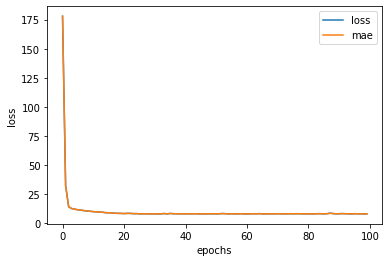

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)
y_test

31     52.91
109    55.90
136    74.50
88     35.30
918    10.54
       ...  
482    56.14
545    18.75
110    38.00
514    74.36
602    35.17
Name: Cc_Strength, Length: 206, dtype: float64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer casn be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(x_train, y_train, epochs= 150, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 8.1098 - mae: 8.1098


[8.109818458557129, 8.109818458557129]

Text(0.5, 0, 'epochs')

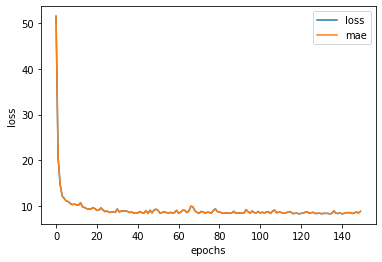

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)
y_test

31     52.91
109    55.90
136    74.50
88     35.30
918    10.54
       ...  
482    56.14
545    18.75
110    38.00
514    74.36
602    35.17
Name: Cc_Strength, Length: 206, dtype: float64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(4),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer casn be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

# STEP3: Fit the model
history= model.fit(x_train, y_train, epochs= 120, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 8.9919 - mae: 8.9919


[8.991905212402344, 8.991905212402344]

Text(0.5, 0, 'epochs')

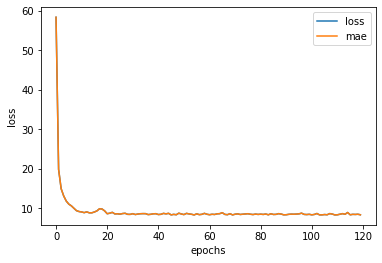

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# **NEURAL NETWORK** 70:30

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=42)
y_test

31     52.91
109    55.90
136    74.50
88     35.30
918    10.54
       ...  
250    24.92
377    36.30
615    32.33
9      39.29
357    66.82
Name: Cc_Strength, Length: 309, dtype: float64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(6),
                            tf.keras.layers.Dense(4),
                            tf.keras.layers.Dense(2),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer casn be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

# STEP3: Fit the model
history= model.fit(x_train, y_train, epochs= 100, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 8.8493 - mae: 8.8493


[8.849311828613281, 8.849311828613281]

Text(0.5, 0, 'epochs')

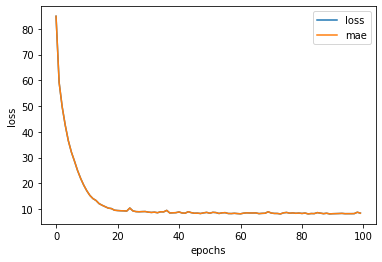

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=42)
y_test

31     52.91
109    55.90
136    74.50
88     35.30
918    10.54
       ...  
250    24.92
377    36.30
615    32.33
9      39.29
357    66.82
Name: Cc_Strength, Length: 309, dtype: float64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer casn be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

# STEP3: Fit the model
history= model.fit(x_train, y_train, epochs= 120, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 9.0958 - mae: 9.0958


[9.095842361450195, 9.095842361450195]

Text(0.5, 0, 'epochs')

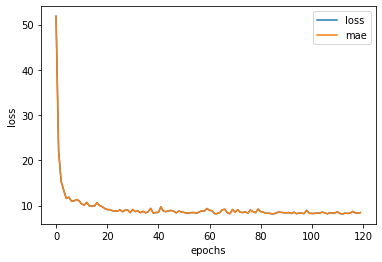

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=42)
y_test

31     52.91
109    55.90
136    74.50
88     35.30
918    10.54
       ...  
250    24.92
377    36.30
615    32.33
9      39.29
357    66.82
Name: Cc_Strength, Length: 309, dtype: float64

In [ ]:
tf.random.set_seed(42)
# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(7),
                            tf.keras.layers.Dense(2),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer casn be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

# STEP3: Fit the model
history= model.fit(x_train, y_train, epochs= 90, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 9.4041 - mae: 9.4041


[9.4041109085083, 9.4041109085083]

Text(0.5, 0, 'epochs')

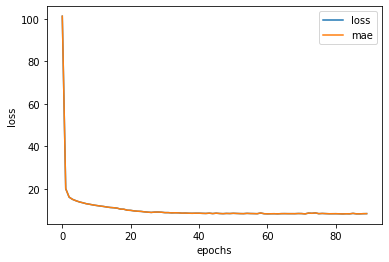

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=42)
y_test

31     52.91
109    55.90
136    74.50
88     35.30
918    10.54
       ...  
250    24.92
377    36.30
615    32.33
9      39.29
357    66.82
Name: Cc_Strength, Length: 309, dtype: float64

In [ ]:
tf.random.set_seed(42)
# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(4),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer casn be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

# STEP3: Fit the model
history= model.fit(x_train, y_train, epochs= 30, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 8.6334 - mae: 8.6334


[8.633360862731934, 8.633360862731934]

Text(0.5, 0, 'epochs')

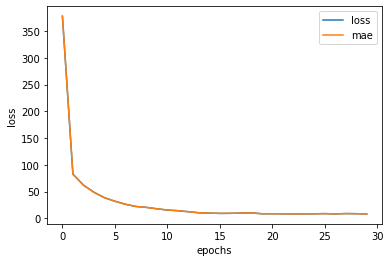

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=42)
y_test

31     52.91
109    55.90
136    74.50
88     35.30
918    10.54
       ...  
250    24.92
377    36.30
615    32.33
9      39.29
357    66.82
Name: Cc_Strength, Length: 309, dtype: float64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(6),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer casn be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(x_train, y_train, epochs= 35, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 8.6158 - mae: 8.6158


[8.615785598754883, 8.615785598754883]

Text(0.5, 0, 'epochs')

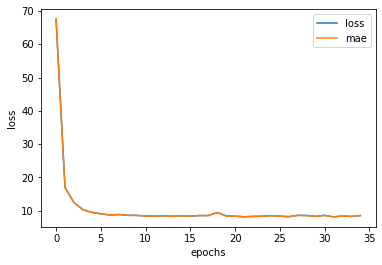

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# **NEURAL NETWORK** 60:40

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.4, random_state=42)
y_test

31     52.91
109    55.90
136    74.50
88     35.30
918    10.54
       ...  
429    29.59
665    11.39
986    37.17
169    65.20
525    25.12
Name: Cc_Strength, Length: 412, dtype: float64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(4),
                            tf.keras.layers.Dense(7),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer casn be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(x_train, y_train, epochs= 55, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

13/13 [==============================] - 0s 2ms/step - loss: 8.7224 - mae: 8.7224


[8.722375869750977, 8.722375869750977]

Text(0.5, 0, 'epochs')

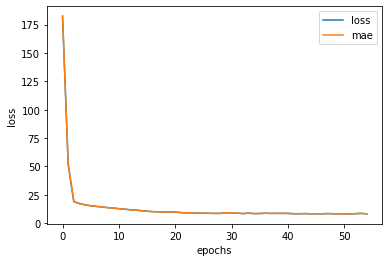

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.4, random_state=42)
y_test

31     52.91
109    55.90
136    74.50
88     35.30
918    10.54
       ...  
429    29.59
665    11.39
986    37.17
169    65.20
525    25.12
Name: Cc_Strength, Length: 412, dtype: float64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(2),
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer casn be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(x_train, y_train, epochs= 735, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

13/13 [==============================] - 0s 2ms/step - loss: 8.6123 - mae: 8.6123


[8.612344741821289, 8.612344741821289]

Text(0.5, 0, 'epochs')

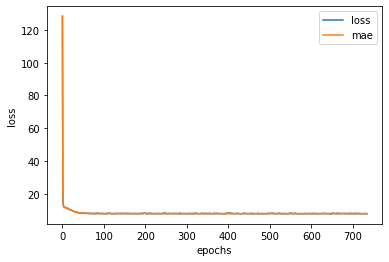

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
model.summary();

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 8)                 72        
                                                                 
 dense_46 (Dense)            (None, 2)                 18        
                                                                 
 dense_47 (Dense)            (None, 8)                 24        
                                                                 
 dense_48 (Dense)            (None, 5)                 45        
                                                                 
 dense_49 (Dense)            (None, 1)                 6         
                                                                 
Total params: 165
Trainable params: 165
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.4, random_state=42)
y_test

31     52.91
109    55.90
136    74.50
88     35.30
918    10.54
       ...  
429    29.59
665    11.39
986    37.17
169    65.20
525    25.12
Name: Cc_Strength, Length: 412, dtype: float64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(6),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer casn be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(x_train, y_train, epochs= 70, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

13/13 [==============================] - 0s 2ms/step - loss: 8.4391 - mae: 8.4391


[8.439092636108398, 8.439092636108398]

Text(0.5, 0, 'epochs')

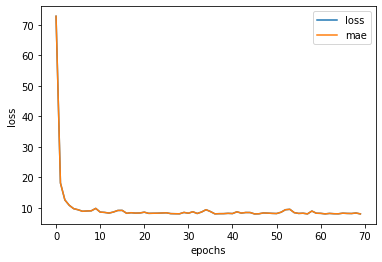

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.4, random_state=42)
y_test

31     52.91
109    55.90
136    74.50
88     35.30
918    10.54
       ...  
429    29.59
665    11.39
986    37.17
169    65.20
525    25.12
Name: Cc_Strength, Length: 412, dtype: float64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(7),
                            tf.keras.layers.Dense(2),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer casn be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(x_train, y_train, epochs= 90, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

13/13 [==============================] - 0s 2ms/step - loss: 8.4344 - mae: 8.4344


[8.434414863586426, 8.434414863586426]

Text(0.5, 0, 'epochs')

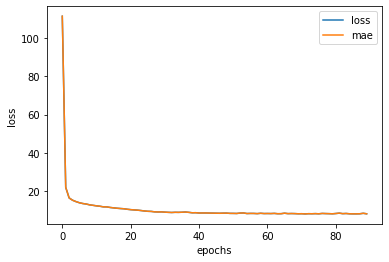

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.4, random_state=42)
y_test

31     52.91
109    55.90
136    74.50
88     35.30
918    10.54
       ...  
429    29.59
665    11.39
986    37.17
169    65.20
525    25.12
Name: Cc_Strength, Length: 412, dtype: float64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(4),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer casn be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(x_train, y_train, epochs= 30, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

13/13 [==============================] - 0s 2ms/step - loss: nan - mae: nan


[nan, nan]

Text(0.5, 0, 'epochs')

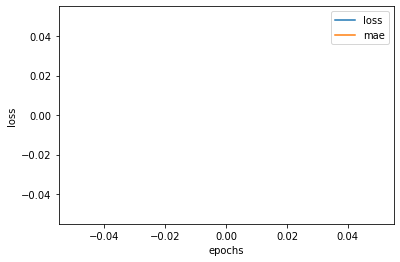

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.4, random_state=42)
y_test

31     52.91
109    55.90
136    74.50
88     35.30
918    10.54
       ...  
429    29.59
665    11.39
986    37.17
169    65.20
525    25.12
Name: Cc_Strength, Length: 412, dtype: float64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(6),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer casn be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(x_train, y_train, epochs= 35, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

13/13 [==============================] - 0s 2ms/step - loss: 8.9419 - mae: 8.9419


[8.941946983337402, 8.941946983337402]

Text(0.5, 0, 'epochs')

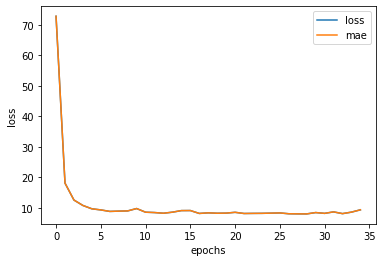

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.4, random_state=42)
y_test

31     52.91
109    55.90
136    74.50
88     35.30
918    10.54
       ...  
429    29.59
665    11.39
986    37.17
169    65.20
525    25.12
Name: Cc_Strength, Length: 412, dtype: float64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(4),
                            tf.keras.layers.Dense(7),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer casn be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(x_train, y_train, epochs=55, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

13/13 [==============================] - 0s 2ms/step - loss: 8.7224 - mae: 8.7224


[8.722375869750977, 8.722375869750977]

Text(0.5, 0, 'epochs')

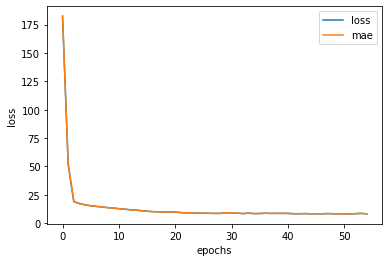

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.4, random_state=42)
y_test

31     52.91
109    55.90
136    74.50
88     35.30
918    10.54
       ...  
429    29.59
665    11.39
986    37.17
169    65.20
525    25.12
Name: Cc_Strength, Length: 412, dtype: float64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(2),
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer casn be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(x_train, y_train, epochs=735, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

13/13 [==============================] - 0s 2ms/step - loss: 8.6123 - mae: 8.6123


[8.612344741821289, 8.612344741821289]

Text(0.5, 0, 'epochs')

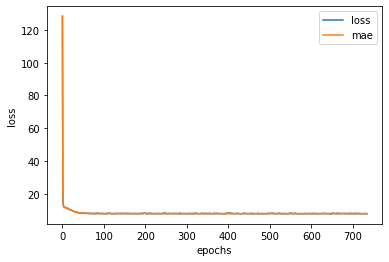

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)
y_test

31     52.91
109    55.90
136    74.50
88     35.30
918    10.54
       ...  
482    56.14
545    18.75
110    38.00
514    74.36
602    35.17
Name: Cc_Strength, Length: 206, dtype: float64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(6),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer casn be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(x_train, y_train, epochs=70, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 7.9833 - mae: 7.9833


[7.983250141143799, 7.983250141143799]

Text(0.5, 0, 'epochs')

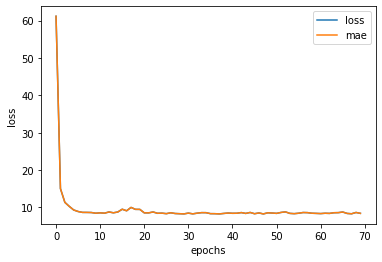

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
model.summary();

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 8)                 72        
                                                                 
 dense_81 (Dense)            (None, 3)                 27        
                                                                 
 dense_82 (Dense)            (None, 5)                 20        
                                                                 
 dense_83 (Dense)            (None, 6)                 36        
                                                                 
 dense_84 (Dense)            (None, 1)                 7         
                                                                 
Total params: 162
Trainable params: 162
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)
y_test

31     52.91
109    55.90
136    74.50
88     35.30
918    10.54
       ...  
482    56.14
545    18.75
110    38.00
514    74.36
602    35.17
Name: Cc_Strength, Length: 206, dtype: float64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(6),
                            tf.keras.layers.Dense(4),
                            tf.keras.layers.Dense(2),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer casn be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(x_train, y_train, epochs= 170, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 7.9576 - mae: 7.9576


[7.957597255706787, 7.957597255706787]

Text(0.5, 0, 'epochs')

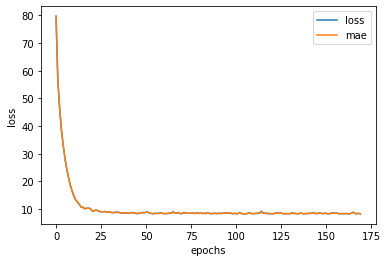

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)
y_test

31     52.91
109    55.90
136    74.50
88     35.30
918    10.54
       ...  
482    56.14
545    18.75
110    38.00
514    74.36
602    35.17
Name: Cc_Strength, Length: 206, dtype: float64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(4),
                            tf.keras.layers.Dense(2),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer casn be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(x_train, y_train, epochs= 370, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 7.9454 - mae: 7.9454


[7.945353031158447, 7.945353031158447]

Text(0.5, 0, 'epochs')

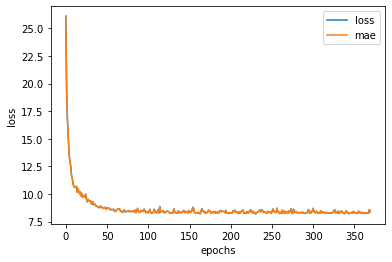

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=42)
y_test

31     52.91
109    55.90
136    74.50
88     35.30
918    10.54
       ...  
250    24.92
377    36.30
615    32.33
9      39.29
357    66.82
Name: Cc_Strength, Length: 309, dtype: float64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(4),
                            tf.keras.layers.Dense(2),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer casn be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(x_train, y_train, epochs= 370, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

10/10 [==============================] - 0s 3ms/step - loss: 8.5132 - mae: 8.5132


[8.513225555419922, 8.513225555419922]

Text(0.5, 0, 'epochs')

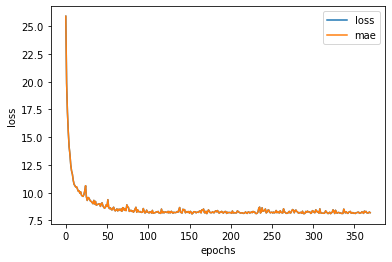

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.4, random_state=42)
y_test

31     52.91
109    55.90
136    74.50
88     35.30
918    10.54
       ...  
429    29.59
665    11.39
986    37.17
169    65.20
525    25.12
Name: Cc_Strength, Length: 412, dtype: float64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(4),
                            tf.keras.layers.Dense(2),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer casn be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(x_train, y_train, epochs= 270, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

13/13 [==============================] - 0s 2ms/step - loss: 8.6159 - mae: 8.6159


[8.615865707397461, 8.615865707397461]

Text(0.5, 0, 'epochs')

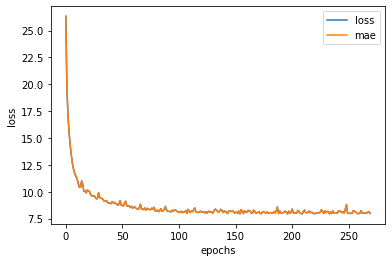

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.4, random_state=42)
y_test

31     52.91
109    55.90
136    74.50
88     35.30
918    10.54
       ...  
429    29.59
665    11.39
986    37.17
169    65.20
525    25.12
Name: Cc_Strength, Length: 412, dtype: float64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(6),
                            tf.keras.layers.Dense(4),
                            tf.keras.layers.Dense(2),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer casn be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(x_train, y_train, epochs= 400, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

13/13 [==============================] - 0s 2ms/step - loss: 8.5686 - mae: 8.5686


[8.568601608276367, 8.568601608276367]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)
y_test

31     52.91
109    55.90
136    74.50
88     35.30
918    10.54
       ...  
482    56.14
545    18.75
110    38.00
514    74.36
602    35.17
Name: Cc_Strength, Length: 206, dtype: float64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(6),
                            tf.keras.layers.Dense(4),
                            tf.keras.layers.Dense(2),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer casn be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(x_train, y_train, epochs= 1000, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 8.0546 - mae: 8.0546


[8.054604530334473, 8.054604530334473]

# **BAGGING**

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
bag_model = BaggingRegressor(
base_estimator=BaggingRegressor(), 
n_estimators=500, 
max_samples=0.8, 
bootstrap=True,
oob_score=True,
random_state=42
)

In [ ]:
l=bag_model.fit(x_train, y_train)

In [ ]:
mae = metrics.mean_absolute_error(y_test, l.predict(x_test))
print("The mean abs error (MAE) on test set: {:.10f}".format(mae))

The mean abs error (MAE) on test set: 4.3228750661


**bagging method 2**

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
bag_model = BaggingRegressor(
base_estimator=BaggingRegressor(), 
n_estimators=700, 
max_samples=0.8, 
bootstrap=True,
oob_score=True,
random_state=42
)

In [ ]:
l=bag_model.fit(x_train, y_train)

In [ ]:
mae = metrics.mean_absolute_error(y_test, l.predict(x_test))
print("The mean abs error (MAE) on test set: {:.10f}".format(mae))

The mean abs error (MAE) on test set: 4.3320147051


**bagging method 3**

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
bag_model = BaggingRegressor(
base_estimator=BaggingRegressor(), 
n_estimators=750, 
max_samples=0.8, 
bootstrap=True,
oob_score=True,
random_state=42
)

In [ ]:
l=bag_model.fit(x_train, y_train)

In [ ]:
mae = metrics.mean_absolute_error(y_test, l.predict(x_test))
print("The mean abs error (MAE) on test set: {:.10f}".format(mae))

The mean abs error (MAE) on test set: 4.3354448028


# **BOOSTING**

# **GRADIENT BOOSTING**

In [ ]:
from sklearn import datasets, ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
regressor = GradientBoostingRegressor(
    max_depth=5,
    n_estimators=750,
    learning_rate=0.15,
    random_state=23 )
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
mean_absolute_error(y_test, y_pred)

2.9265978733238587

**gradient boosting method 2**

In [ ]:
from sklearn import datasets, ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
regressor = GradientBoostingRegressor(
    max_depth=5,
    n_estimators=650,
    learning_rate=0.15,
    random_state=42 )
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
mean_absolute_error(y_test, y_pred)

2.9300604430105355

**gradient boosting method 3**

In [ ]:
from sklearn import datasets, ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
regressor = GradientBoostingRegressor(
    max_depth=5,
    n_estimators=800,
    learning_rate=0.15,
    random_state=42 )
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
mean_absolute_error(y_test, y_pred)

2.9318601627321246

# **EXTREME GRADIENT BOOSTING**

In [ ]:
from xgboost import XGBRegressor
clf = XGBRegressor(n_estimators=750,
                   learning_rate=0.15,
                   max_depth=5,
                   random_state=23)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
eg=mean_absolute_error(y_test, y_pred)
print("mean absolute error",eg)

[10:46:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
mean absolute error 2.8415557635872104


**extreme gradient boosting method 2**

In [ ]:
from xgboost import XGBRegressor
clf = XGBRegressor(n_estimators=400,
                   learning_rate=0.15,
                   max_depth=5,
                   random_state=23)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
eg=mean_absolute_error(y_test, y_pred)
print("mean absolute error",eg)

[10:46:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
mean absolute error 2.865153878869362


**extreme boosting method 3**

In [ ]:
from xgboost import XGBRegressor
clf = XGBRegressor(n_estimators=600,
                   learning_rate=0.15,
                   max_depth=5,
                   random_state=23)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
eg=mean_absolute_error(y_test, y_pred)
print("mean absolute error",eg)

[10:46:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
mean absolute error 2.8455254270035084


# **ADAPTIVE BOOSTING**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

adaclf = AdaBoostRegressor( 
                           n_estimators=750,
                           learning_rate=0.15,
                           random_state=42)
    
adaclf.fit(x_train, y_train)
y_pred_1 = adaclf.predict(x_test)
ab=mean_absolute_error(y_test, y_pred_1)
print("mean absolute eroor",ab)

mean absolute eroor 6.47043780975161


**adaboost method 2**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

adaclf = AdaBoostRegressor( 
                           n_estimators=650,
                           learning_rate=0.15,
                           random_state=23)
    
adaclf.fit(x_train, y_train)
y_pred_1 = adaclf.predict(x_test)
ab=mean_absolute_error(y_test, y_pred_1)
print("mean absolute eroor",ab)

mean absolute eroor 6.425250420753397


**adaboost method 3**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

adaclf = AdaBoostRegressor( 
                           n_estimators=350,
                           learning_rate=0.15,
                           random_state=42)
    
adaclf.fit(x_train, y_train)
y_pred_1 = adaclf.predict(x_test)
ab=mean_absolute_error(y_test, y_pred_1)
print("mean absolute eroor",ab)

mean absolute eroor 6.484675194367082
